In [47]:
import pandas as pd
import numpy as np

## 读取数据

In [7]:
credit = pd.read_csv('./credit2.csv')

In [8]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36457 entries, 0 to 36456
Data columns (total 22 columns):
Unnamed: 0             36457 non-null int64
ID                     36457 non-null int64
CODE_GENDER            36457 non-null object
FLAG_OWN_CAR           36457 non-null object
FLAG_OWN_REALTY        36457 non-null object
CNT_CHILDREN           36457 non-null int64
AMT_INCOME_TOTAL       36457 non-null float64
NAME_INCOME_TYPE       36457 non-null object
NAME_EDUCATION_TYPE    36457 non-null object
NAME_FAMILY_STATUS     36457 non-null object
NAME_HOUSING_TYPE      36457 non-null object
DAYS_BIRTH             36457 non-null int64
DAYS_EMPLOYED          36457 non-null int64
FLAG_MOBIL             36457 non-null int64
FLAG_WORK_PHONE        36457 non-null int64
FLAG_PHONE             36457 non-null int64
FLAG_EMAIL             36457 non-null int64
OCCUPATION_TYPE        25134 non-null object
CNT_FAM_MEMBERS        36457 non-null float64
begin_month            36457 non-null float

In [9]:
credit.head()

,Unnamed: 0,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,...,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,begin_month,dep_value,target
0,0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,...,-4542,1,1,0,0,NaN,2.0,-15.0,No,0
1,1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,...,-4542,1,1,0,0,NaN,2.0,-14.0,No,0
2,2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,...,-1134,1,0,0,0,Security staff,2.0,-29.0,No,0
3,3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,...,-3051,1,0,1,1,Sales staff,1.0,-4.0,No,0
4,4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,...,-3051,1,0,1,1,Sales staff,1.0,-26.0,No,0


## 丢弃无用columns

In [10]:
credit = credit.drop(columns=['Unnamed: 0','dep_value'], axis=1)
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36457 entries, 0 to 36456
Data columns (total 20 columns):
ID                     36457 non-null int64
CODE_GENDER            36457 non-null object
FLAG_OWN_CAR           36457 non-null object
FLAG_OWN_REALTY        36457 non-null object
CNT_CHILDREN           36457 non-null int64
AMT_INCOME_TOTAL       36457 non-null float64
NAME_INCOME_TYPE       36457 non-null object
NAME_EDUCATION_TYPE    36457 non-null object
NAME_FAMILY_STATUS     36457 non-null object
NAME_HOUSING_TYPE      36457 non-null object
DAYS_BIRTH             36457 non-null int64
DAYS_EMPLOYED          36457 non-null int64
FLAG_MOBIL             36457 non-null int64
FLAG_WORK_PHONE        36457 non-null int64
FLAG_PHONE             36457 non-null int64
FLAG_EMAIL             36457 non-null int64
OCCUPATION_TYPE        25134 non-null object
CNT_FAM_MEMBERS        36457 non-null float64
begin_month            36457 non-null float64
target                 36457 non-null int

## 处理columns


In [11]:
credit['month_on_book'] = -credit['begin_month']
# 将年龄和工龄转换为年
credit['DAYS_BIRTH'] = -credit['DAYS_BIRTH'] / 365
credit['DAYS_EMPLOYED'] = credit['DAYS_EMPLOYED'] / 365
credit.rename(columns={'DAYS_BIRTH': 'age', 'DAYS_EMPLOYED':'work_year'}, inplace=True)
credit.drop(columns='begin_month', axis=1, inplace=True)
# 将工资按照 'k'为单位
credit['AMT_INCOME_TOTAL'] = credit['AMT_INCOME_TOTAL'] / 1000
# 处理flag类二分数据
dic = {'Y': 1, 'N': 0}
credit['FLAG_OWN_CAR'] = credit['FLAG_OWN_CAR'].replace(dic)
credit['FLAG_OWN_REALTY'] = credit['FLAG_OWN_REALTY'].replace(dic)
credit['CODE_GENDER'] = credit['CODE_GENDER'].replace({'M':1, 'F':0})

In [12]:
credit

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,age,work_year,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,target,month_on_book
0,5008804,1,1,1,0,427.5,Working,Higher education,Civil marriage,Rented apartment,32.890411,-12.443836,1,1,0,0,NaN,2.0,0,15.0
1,5008805,1,1,1,0,427.5,Working,Higher education,Civil marriage,Rented apartment,32.890411,-12.443836,1,1,0,0,NaN,2.0,0,14.0
2,5008806,1,1,1,0,112.5,Working,Secondary / secondary special,Married,House / apartment,58.832877,-3.106849,1,0,0,0,Security staff,2.0,0,29.0
3,5008808,0,0,1,0,270.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,-8.358904,1,0,1,1,Sales staff,1.0,0,4.0
4,5008809,0,0,1,0,270.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,-8.358904,1,0,1,1,Sales staff,1.0,0,26.0
5,5008810,0,0,1,0,270.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,-8.358904,1,0,1,1,Sales staff,1.0,0,26.0
6,5008811,0,0,1,0,270.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,-8.358904,1,0,1,1,Sales staff,1.0,0,38.0
7,5008812,0,0,1,0,283.5,Pensioner,Higher education,Separated,House / apartment,61.545205,1000.665753,1,0,0,0,NaN,1.0,0,20.0
8,5008813,0,0,1,0,283.5,Pensioner,Higher education,Separated,House / apartment,61.545205,1000.665753,1,0,0,0,NaN,1.0,0,16.0
9,5008814,0,0,1,0,283.5,Pensioner,Higher education,Separated,House / apartment,61.545205,1000.665753,1,0,0,0,NaN,1.0,0,17.0


In [13]:
credit.isna().sum()

ID                         0
CODE_GENDER                0
FLAG_OWN_CAR               0
FLAG_OWN_REALTY            0
CNT_CHILDREN               0
AMT_INCOME_TOTAL           0
NAME_INCOME_TYPE           0
NAME_EDUCATION_TYPE        0
NAME_FAMILY_STATUS         0
NAME_HOUSING_TYPE          0
age                        0
work_year                  0
FLAG_MOBIL                 0
FLAG_WORK_PHONE            0
FLAG_PHONE                 0
FLAG_EMAIL                 0
OCCUPATION_TYPE        11323
CNT_FAM_MEMBERS            0
target                     0
month_on_book              0
dtype: int64

可以看出职业一栏有许多空数据

In [14]:
# 对于缺失的工作column，由于其缺失值 11323过大，我们对其该column进行舍弃
credit.drop(columns='OCCUPATION_TYPE', inplace=True)

这样就处理了工作类型的缺失值

## 数据分析及处理

In [15]:
# 二分类对应列
flag_col = [i for i in credit.columns if i.startswith('FLAG_')]

In [16]:
from matplotlib import pyplot as plt

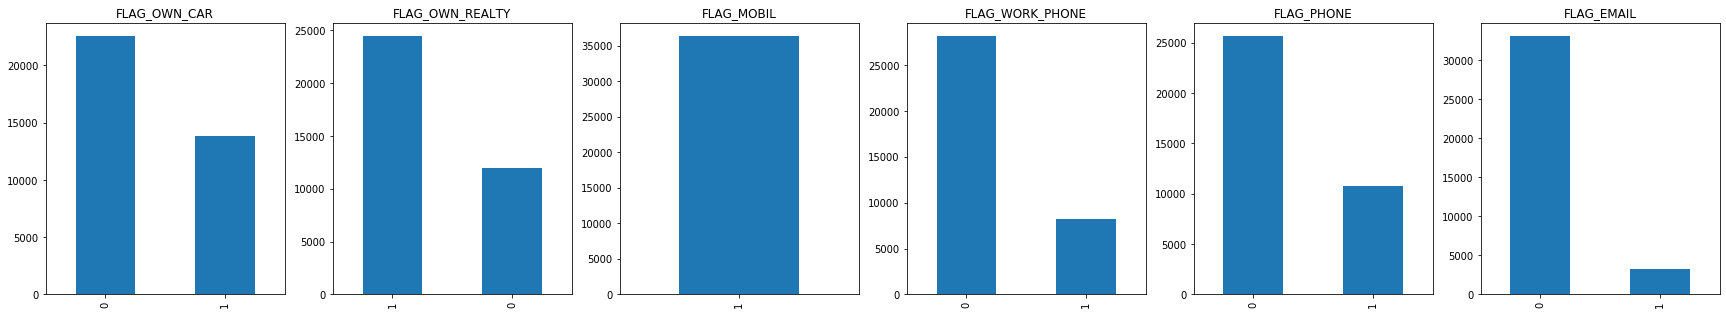

In [17]:
_, axes = plt.subplots(ncols=len(flag_col), figsize=(30, 5))
for col, ax in zip(flag_col, axes):
    credit[col].value_counts().plot(kind='bar', ax=ax, title=col)
plt.show()

In [18]:
# 由上图可知，FLAG_MOBIL全部为1，显然可以消除
credit.drop(columns='FLAG_MOBIL', axis=1, inplace=True)

In [19]:
name_cols = [col for col in credit.columns if col.startswith('NAME_')]

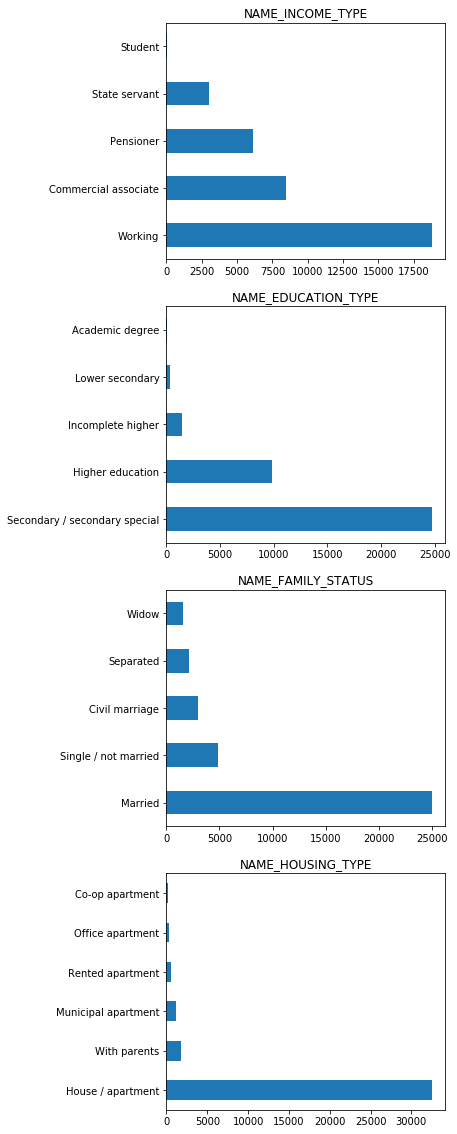

In [20]:
_, axes = plt.subplots(nrows=len(name_cols), figsize=(5, 20))
for col, ax in zip(name_cols, axes):
    credit[col].value_counts().plot(kind='barh', ax=ax, title=col)
plt.show()

In [21]:
amt_cols = ['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'CNT_FAM_MEMBERS', 'month_on_book', 'age', 'work_year']

In [22]:
import seaborn as sns

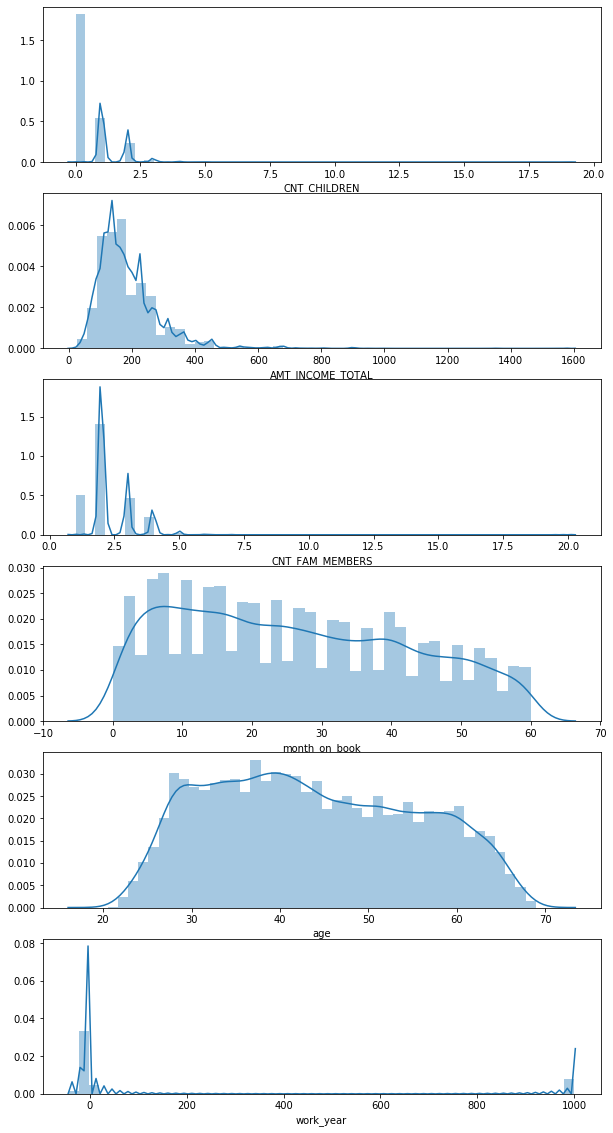

In [23]:
_, axes = plt.subplots(nrows=len(amt_cols), figsize=(10, 20))
for col, ax in zip(amt_cols, axes):
    sns.distplot(credit[col], ax=ax)
plt.show()

In [24]:
desc = round(credit[amt_cols].describe(), 0)
desc

,CNT_CHILDREN,AMT_INCOME_TOTAL,CNT_FAM_MEMBERS,month_on_book,age,work_year
count,36457.0,36457.0,36457.0,36457.0,36457.0,36457.0
mean,0.0,187.0,2.0,26.0,44.0,162.0
std,1.0,102.0,1.0,17.0,12.0,377.0
min,0.0,27.0,1.0,-0.0,21.0,-43.0
25%,0.0,122.0,2.0,12.0,34.0,-9.0
50%,0.0,158.0,2.0,24.0,43.0,-4.0
75%,1.0,225.0,3.0,39.0,53.0,-1.0
max,19.0,1575.0,20.0,60.0,69.0,1001.0


In [25]:
credit[credit['work_year'] > 0]

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,age,work_year,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,target,month_on_book
7,5008812,0,0,1,0,283.50,Pensioner,Higher education,Separated,House / apartment,61.545205,1000.665753,0,0,0,1.0,0,20.0
8,5008813,0,0,1,0,283.50,Pensioner,Higher education,Separated,House / apartment,61.545205,1000.665753,0,0,0,1.0,0,16.0
9,5008814,0,0,1,0,283.50,Pensioner,Higher education,Separated,House / apartment,61.545205,1000.665753,0,0,0,1.0,0,17.0
69,5008884,0,0,1,0,315.00,Pensioner,Secondary / secondary special,Widow,House / apartment,55.304110,1000.665753,0,0,0,1.0,0,40.0
150,5008974,0,0,1,0,112.50,Pensioner,Secondary / secondary special,Married,House / apartment,61.147945,1000.665753,0,0,0,2.0,0,49.0
151,5008975,0,0,1,0,112.50,Pensioner,Secondary / secondary special,Married,House / apartment,61.147945,1000.665753,0,0,0,2.0,0,49.0
152,5008976,0,0,1,0,112.50,Pensioner,Secondary / secondary special,Married,House / apartment,61.147945,1000.665753,0,0,0,2.0,0,1.0
153,5008977,0,0,1,0,112.50,Pensioner,Secondary / secondary special,Married,House / apartment,61.147945,1000.665753,0,0,0,2.0,0,23.0
154,5008978,0,0,1,0,112.50,Pensioner,Secondary / secondary special,Married,House / apartment,61.147945,1000.665753,0,0,0,2.0,0,38.0
155,5008979,0,0,1,0,112.50,Pensioner,Secondary / secondary special,Married,House / apartment,61.147945,1000.665753,0,0,0,2.0,0,37.0


有6135条数据存在work_year异常值，且全部为退休人员

In [26]:
# 使用插值法，将异常值替换为去掉异常值之后的平均值
credit.loc[credit['work_year'] > 0, 'work_year'] = credit[credit['work_year'] < 0]['work_year'].max()
credit['work_year'] = -credit['work_year']

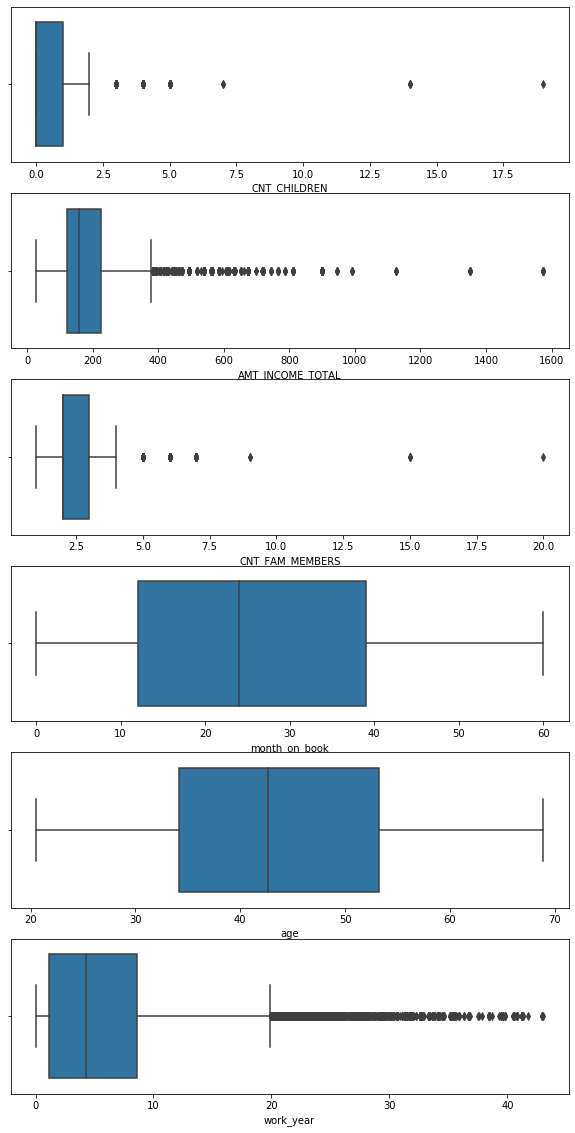

In [27]:
_, axes = plt.subplots(nrows=len(amt_cols), figsize=(10, 20))
for col, ax in zip(amt_cols, axes):
    sns.boxplot(credit[col], ax=ax)
plt.show()

## 变量相关性

In [28]:
credit.describe()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,age,work_year,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,target,month_on_book
count,3.645700e+04,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000
mean,5.078227e+06,0.329895,0.379708,0.672189,0.430315,186.685737,43.767598,6.036104,0.225526,0.294813,0.089722,2.198453,0.016897,26.164193
std,4.187524e+04,0.470181,0.485321,0.469422,0.742367,101.789226,11.508356,6.477107,0.417934,0.455965,0.285787,0.911686,0.128886,16.501854
min,5.008804e+06,0.000000,0.000000,0.000000,0.000000,27.000000,20.517808,0.046575,0.000000,0.000000,0.000000,1.000000,0.000000,-0.000000
25%,5.042028e+06,0.000000,0.000000,0.000000,0.000000,121.500000,34.142466,1.117808,0.000000,0.000000,0.000000,2.000000,0.000000,12.000000
50%,5.074614e+06,0.000000,0.000000,1.000000,0.000000,157.500000,42.638356,4.252055,0.000000,0.000000,0.000000,2.000000,0.000000,24.000000
75%,5.115396e+06,1.000000,1.000000,1.000000,1.000000,225.000000,53.254795,8.638356,0.000000,1.000000,0.000000,3.000000,0.000000,39.000000
max,5.150487e+06,1.000000,1.000000,1.000000,19.000000,1575.000000,68.909589,43.049315,1.000000,1.000000,1.000000,20.000000,1.000000,60.000000


17


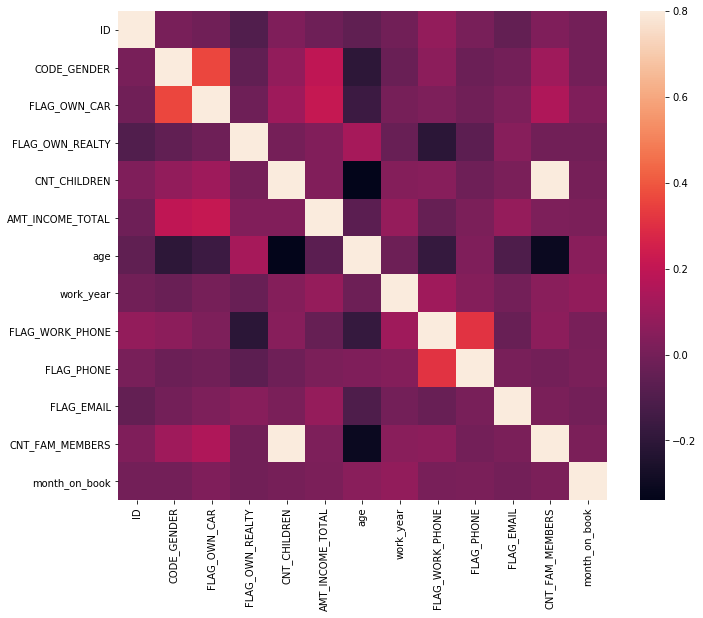

In [29]:
feat_cols: list = credit.columns.to_list()
feat_cols.remove('target')
feat_cols
credit_train:pd.DataFrame = credit[feat_cols]
corr_mat = credit_train.corr()
_, _ = plt.subplots(figsize=(12, 9))
print(len(feat_cols))
sns.heatmap(corr_mat, vmax=.8, square=True)

小孩个数和家庭成员个数显然相关

* ### 小孩个数

In [30]:
credit.drop(columns='CNT_CHILDREN', inplace=True)

可以看出有超过2个小孩的家庭占少数，应当进行合并

* ### 家庭成员个数

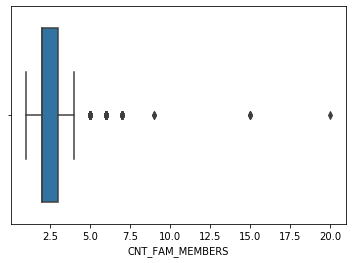

In [31]:
# 将3个及其以上的家庭CNT_FAM_MEMBERS设为more
sns.boxplot(credit['CNT_FAM_MEMBERS'])
credit.loc[credit['CNT_FAM_MEMBERS'] >= 3, 'CNT_FAM_MEMBERS'] = 'more'

In [32]:
credit['CNT_FAM_MEMBERS'].value_counts()

2.0     19463
more    10007
1.0      6987
Name: CNT_FAM_MEMBERS, dtype: int64

* ## 住房情况

In [33]:
credit['NAME_HOUSING_TYPE'].value_counts()

House / apartment      32548
With parents            1776
Municipal apartment     1128
Rented apartment         575
Office apartment         262
Co-op apartment          168
Name: NAME_HOUSING_TYPE, dtype: int64

In [34]:
# 我们将用户划分为 拥有/无 住房和公寓（1/0），从而将上述多类型变量转换为二分类 HOUSING_STATUS
credit['housing-status'] = credit['NAME_HOUSING_TYPE'].apply(lambda x: 1 if x == 'House / apartment' else 0)
credit.drop(columns='NAME_HOUSING_TYPE', inplace=True)

In [35]:
credit['housing-status'].value_counts()

1    32548
0     3909
Name: housing-status, dtype: int64

* ### 婚姻情况

In [36]:
credit['NAME_FAMILY_STATUS'].value_counts()

Married                 25048
Single / not married     4829
Civil marriage           2945
Separated                2103
Widow                    1532
Name: NAME_FAMILY_STATUS, dtype: int64

In [37]:
credit['marriage_status'] = credit['NAME_FAMILY_STATUS'].apply(lambda x: 1 if (x == 'Married' or x == 'Civil marriage') else 0)
credit.drop(columns='NAME_FAMILY_STATUS', inplace=True)

In [38]:
credit['marriage_status'].value_counts()

1    27993
0     8464
Name: marriage_status, dtype: int64

* ## 无量纲化

In [39]:
from sklearn.preprocessing import StandardScaler, RobustScaler
scl = StandardScaler()
rbs = RobustScaler()
# 年龄和帐龄几乎无离群值，正常处理
scl_data = scl.fit_transform(credit[['age', 'month_on_book']])
# 离群值较多使用 RobustScaler 处理
rbs_data = rbs.fit_transform(credit[['work_year', 'AMT_INCOME_TOTAL']])
credit[['age', 'month_on_book']] = scl_data
credit[['work_year', 'AMT_INCOME_TOTAL']] = rbs_data
credit

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,age,work_year,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,target,month_on_book,housing-status,marriage_status
0,5008804,1,1,1,2.608696,Working,Higher education,-0.945169,1.089253,1,0,0,2,0,-0.676551,0,1
1,5008805,1,1,1,2.608696,Working,Higher education,-0.945169,1.089253,1,0,0,2,0,-0.737151,0,1
2,5008806,1,1,1,-0.434783,Working,Secondary / secondary special,1.309091,-0.152277,0,0,0,2,0,0.171850,1,1
3,5008808,0,0,1,1.086957,Commercial associate,Secondary / secondary special,0.746300,0.546084,0,1,1,1,0,-1.343152,1,0
4,5008809,0,0,1,1.086957,Commercial associate,Secondary / secondary special,0.746300,0.546084,0,1,1,1,0,-0.009950,1,0
5,5008810,0,0,1,1.086957,Commercial associate,Secondary / secondary special,0.746300,0.546084,0,1,1,1,0,-0.009950,1,0
6,5008811,0,0,1,1.086957,Commercial associate,Secondary / secondary special,0.746300,0.546084,0,1,1,1,0,0.717251,1,0
7,5008812,0,0,1,1.217391,Pensioner,Higher education,1.544778,-0.559199,0,0,0,1,0,-0.373551,1,0
8,5008813,0,0,1,1.217391,Pensioner,Higher education,1.544778,-0.559199,0,0,0,1,0,-0.615951,1,0
9,5008814,0,0,1,1.217391,Pensioner,Higher education,1.544778,-0.559199,0,0,0,1,0,-0.555351,1,0


In [40]:
#读取数据集，至少包含变量和target两列
sample_set = credit
 
def calc_score_median(sample_set, var):
    '''
    计算相邻评分的中位数，以便进行决策树二元切分
    param sample_set: 待切分样本
    param var: 分割变量名称
    '''
    var_list = list(np.unique(sample_set[var]))
    var_median_list = []
    for i in range(len(var_list) -1):
        var_median = (var_list[i] + var_list[i+1]) / 2
        var_median_list.append(var_median)
    return var_median_list

In [41]:
def choose_best_split(sample_set, var, min_sample):
    '''
    使用CART分类决策树选择最好的样本切分点
    返回切分点
    param sample_set: 待切分样本
    param var: 分割变量名称
    param min_sample: 待切分样本的最小样本量(限制条件)
    '''
    # 根据样本评分计算相邻不同分数的中间值
    score_median_list = calc_score_median(sample_set, var)
    median_len = len(score_median_list)
    sample_cnt = sample_set.shape[0]
    sample1_cnt = sum(sample_set['target'])
    sample0_cnt =  sample_cnt- sample1_cnt
    Gini = 1 - np.square(sample1_cnt / sample_cnt) - np.square(sample0_cnt / sample_cnt)
    
    bestGini = 0.0; bestSplit_point = 0.0; bestSplit_position = 0.0
    for i in range(median_len):
        left = sample_set[sample_set[var] < score_median_list[i]]
        right = sample_set[sample_set[var] > score_median_list[i]]
        
        left_cnt = left.shape[0]; right_cnt = right.shape[0]
        left1_cnt = sum(left['target']); right1_cnt = sum(right['target'])
        left0_cnt =  left_cnt - left1_cnt; right0_cnt =  right_cnt - right1_cnt
        left_ratio = left_cnt / sample_cnt; right_ratio = right_cnt / sample_cnt
        
        if left_cnt < min_sample or right_cnt < min_sample:
            continue
        
        Gini_left = 1 - np.square(left1_cnt / left_cnt) - np.square(left0_cnt / left_cnt)
        Gini_right = 1 - np.square(right1_cnt / right_cnt) - np.square(right0_cnt / right_cnt)
        Gini_temp = Gini - (left_ratio * Gini_left + right_ratio * Gini_right)
        if Gini_temp > bestGini:
            bestGini = Gini_temp; bestSplit_point = score_median_list[i]
            if median_len > 1:
                bestSplit_position = i / (median_len - 1)
            else:
                bestSplit_position = i / median_len
        else:
            continue
               
    Gini = Gini - bestGini
    return bestSplit_point, bestSplit_position

In [42]:
def bining_data_split(sample_set, var, min_sample, split_list):
  '''
  划分数据找到最优分割点list
  param sample_set: 待切分样本
  param var: 分割变量名称
  param min_sample: 待切分样本的最小样本量(限制条件)
  param split_list: 最优分割点list
  '''
  split, position = choose_best_split(sample_set, var, min_sample)
  if split != 0.0:
    split_list.append(split)
  # 根据分割点划分数据集，继续进行划分
  sample_set_left = sample_set[sample_set[var] < split]
  sample_set_right = sample_set[sample_set[var] > split]
  # 如果左子树样本量超过2倍最小样本量，且分割点不是第一个分割点，则切分左子树
  if len(sample_set_left) >= min_sample * 2 and position not in [0.0, 1.0]:
    bining_data_split(sample_set_left, var, min_sample, split_list)
  else:
    None
  # 如果右子树样本量超过2倍最小样本量，且分割点不是最后一个分割点，则切分右子树
  if len(sample_set_right) >= min_sample * 2 and position not in [0.0, 1.0]:
    bining_data_split(sample_set_right, var, min_sample, split_list)
  else:
    None

In [43]:
def get_bestsplit_list(sample_set, var):
  '''
  根据分箱得到最优分割点list
  param sample_set: 待切分样本
  param var: 分割变量名称
  '''
  # 计算最小样本阈值（终止条件）
  min_df = sample_set.shape[0] * 0.05
  split_list = []
  # 计算第一个和最后一个分割点
  bining_data_split(sample_set, var, min_df, split_list)
  return split_list

In [44]:
def split_name(x, sp_list, feat_name):
    name = feat_name + '_'
    no = 1
    if x < sp_list[0]:
        return name + '0'
    for i in range(len(sp_list) - 1):
        if x > sp_list[i] and x < sp_list[i + 1]:
            return name + str(no)
        else:
            no += 1
    return name + str(len(sp_list))

In [54]:
new_df = credit
split_list = get_bestsplit_list(sample_set, 'AMT_INCOME_TOTAL')        
new_df['AMT_INCOME_TOTAL'] = new_df['AMT_INCOME_TOTAL'].apply(func=split_name, args=(split_list, 'income'))
new_df['AMT_INCOME_TOTAL'].value_counts()

split_list = get_bestsplit_list(sample_set, 'age')
new_df['age'] = new_df['age'].apply(func=split_name, args=(split_list, 'age'))
new_df['age'].value_counts()

split_list = get_bestsplit_list(sample_set, 'work_year')
new_df['work_year'] = new_df['work_year'].apply(func=split_name, args=(split_list, 'work_year'))
new_df['work_year'].value_counts()

split_list = get_bestsplit_list(sample_set, 'month_on_book')
new_df['month_on_book'] = new_df['month_on_book'].apply(func=split_name, args=(split_list, 'month_on_book'))
new_df['month_on_book'].value_counts()

month_on_book_0     25086
month_on_book_10     8658
month_on_book_13     2713
Name: month_on_book, dtype: int64

In [55]:
def iv_woe(data:pd.DataFrame, target:str, bins:int = 10) -> (pd.DataFrame, pd.DataFrame):
    """计算woe和IV值
    
    参数：
    - data: dataframe数据
    - target: y列的名称
    - bins: 分箱数（默认是10）
    """
    newDF,woeDF = pd.DataFrame(), pd.DataFrame()
    cols = data.columns
    for ivars in cols[~cols.isin([target])]:
        # 数据类型在bifc中、且数据>10则分箱
        if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars]))>10):
            binned_x = pd.qcut(data[ivars], bins,  duplicates='drop')
            d0 = pd.DataFrame({'x': binned_x, 'y': data[target]})
        else:
            d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})
        d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']
        d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()
        d['Non-Events'] = d['N'] - d['Events']
        d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()
        d['WoE'] = np.log(d['% of Events']/d['% of Non-Events'])
        d['IV'] = d['WoE'] * (d['% of Events'] - d['% of Non-Events'])
        d.insert(loc=0, column='Variable', value=ivars)
        temp =pd.DataFrame({"Variable" : [ivars], "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
        newDF=pd.concat([newDF,temp], axis=0)
        woeDF=pd.concat([woeDF,d], axis=0)
    return newDF, woeDF

In [56]:
new_DF, woeDF = iv_woe(new_df, 'target', bins=20)
new_DF.sort_values(by='IV')

,Variable,IV
0,FLAG_PHONE,0.000150
0,FLAG_EMAIL,0.000366
0,FLAG_OWN_CAR,0.001144
0,FLAG_WORK_PHONE,0.001865
0,housing-status,0.002654
0,CNT_FAM_MEMBERS,0.007330
0,NAME_EDUCATION_TYPE,0.009217
0,AMT_INCOME_TOTAL,0.011490
0,CODE_GENDER,0.013581
0,marriage_status,0.016450


In [58]:
credit = credit.drop(columns=['FLAG_EMAIL', 'FLAG_WORK_PHONE', 'housing-status'])

## 使用SMOTEENN过采样+分割数据集

In [59]:
import xgboost

In [60]:
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE

In [61]:
credit = pd.get_dummies(credit)
feat_cols = credit.columns.to_list()
feat_cols.remove('ID')
feat_cols.remove('target')
X, Y = credit[feat_cols], credit['target']
Y = Y.astype(int)

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
X_b, Y_b = SMOTEENN().fit_sample(X_train, Y_train)

In [63]:
from xgboost import XGBClassifier, plot_importance

In [64]:
from sklearn import metrics

* ## Xgboost

In [72]:
xg_train = xgboost.DMatrix(X_b, Y_b)
clf = XGBClassifier()
cv_res = xgboost.cv(clf.get_xgb_params(), dtrain=xg_train, nfold=5, num_boost_round=500 ,metrics=['auc'])

In [73]:
clf.set_params(n_estimators=cv_res.shape[0])

XGBClassifier(n_estimators=500)

In [74]:
clf.fit(X_b, Y_b)

XGBClassifier(n_estimators=500)

In [75]:
y_pre = clf.predict(X_test)

In [76]:
metrics.accuracy_score(y_pre, Y_test)

0.9752239897604681

In [77]:
cm = metrics.confusion_matrix(y_pre, Y_test)
cm

array([[10656,   175],
       [   96,    11]], dtype=int64)

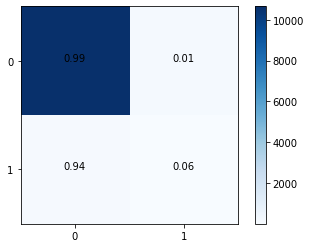

In [78]:
import numpy as np
classes = list(set(Y_test))
indices = range(len(cm))
plt.imshow(cm, cmap=plt.cm.Blues)
plt.xticks(indices, classes)
plt.yticks(indices, classes)
plt.colorbar()
cm = cm / cm.sum(axis=0)[:,]
for i in range(len(cm)):
    for j in range(len(cm[i])):
        plt.text(i, j, format(cm[i][j], '.2f'), horizontalalignment='center')

* ## xgboost roc曲线

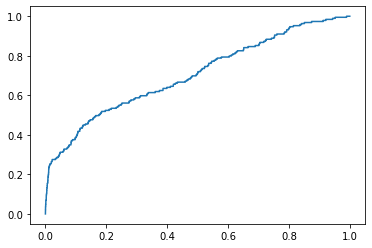

In [198]:
xg_y_score = clf.predict_proba(X_test)
xg_fpr, xg_tpr, x_threasholds = metrics.roc_curve(Y_test, xg_y_score[:, 1])
plt.plot(xg_fpr, xg_tpr)